# Car_Insurance

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
d1 = pd.read_csv('insurance.csv') 
d1

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
d1.shape

(1338, 7)

In [4]:
d1.isna().sum() #The isna() function is used to detect missing values (NaN or None) in a Pandas DataFrame.
#It returns a boolean Series where each value is True if the corresponding value in the DataFrame is missing (NaN or None), and False otherwise

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
d1.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
d1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [8]:
d1.duplicated().sum()

1

In [9]:
d1[d1.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [10]:
d1 = d1.drop_duplicates()
d1

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [11]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [12]:
d1.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [13]:
print("Categorical values in 'region' Variable:", end = " ")
print(d1['region'].unique())

print("Categorical values in 'sex' Variable:", end = " ")
print(d1['sex'].unique())

print("Categorical values in 'children' Variable:", end = " ")
print(d1['children'].unique())

print("Categorical values in 'smoker' Variable:", end = " ")
print(d1['smoker'].unique())

Categorical values in 'region' Variable: ['southwest' 'southeast' 'northwest' 'northeast']
Categorical values in 'sex' Variable: ['female' 'male']
Categorical values in 'children' Variable: [0 1 3 2 5 4]
Categorical values in 'smoker' Variable: ['yes' 'no']


In [14]:
# Difining numerical columns
numerical_features = []
for features in d1.columns:
    if d1[features].dtype != 'O':
        numerical_features.append(features)
print('Numerical features in our data file:', numerical_features)

Numerical features in our data file: ['age', 'bmi', 'children', 'expenses']


In [37]:
# Categorical columns
categorical_features = []
for features in d1.columns:
    if d1[features].dtype == 'O':
        categorical_features.append(features)
print('Catrgorical features in our data file:', categorical_features)

Catrgorical features in our data file: ['sex', 'smoker', 'region']


<Axes: xlabel='smoker', ylabel='count'>

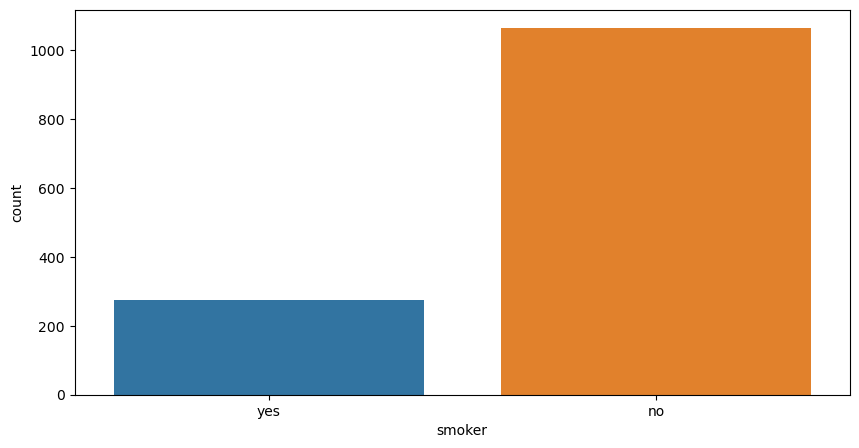

In [16]:
plt.figure(figsize =(10,5)) #matplotlib
sns.countplot(x='smoker',data = d1) #seaborn

<Axes: xlabel='region', ylabel='count'>

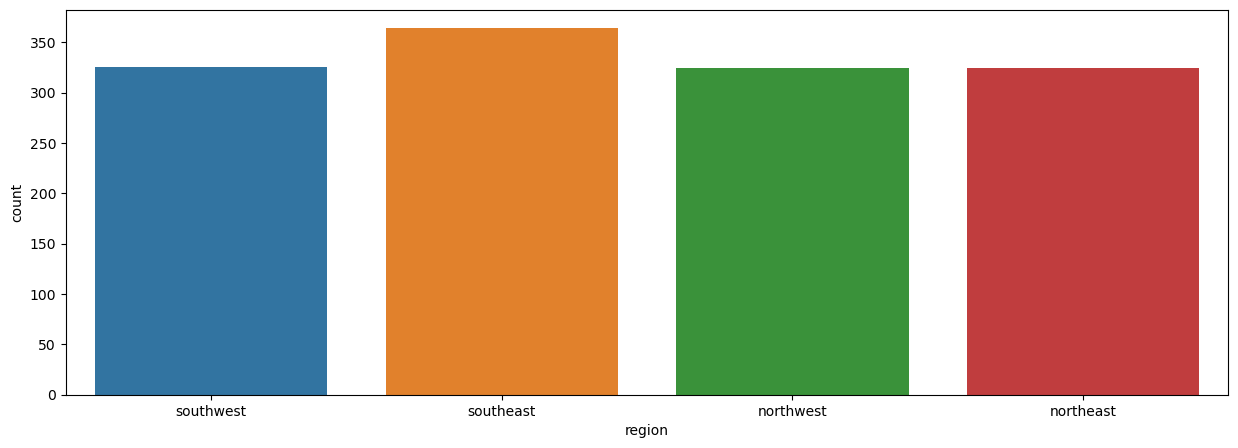

In [17]:
plt.figure(figsize =(15,5)) #matplotlib
sns.countplot(x='region',data = d1)

<Axes: xlabel='age', ylabel='count'>

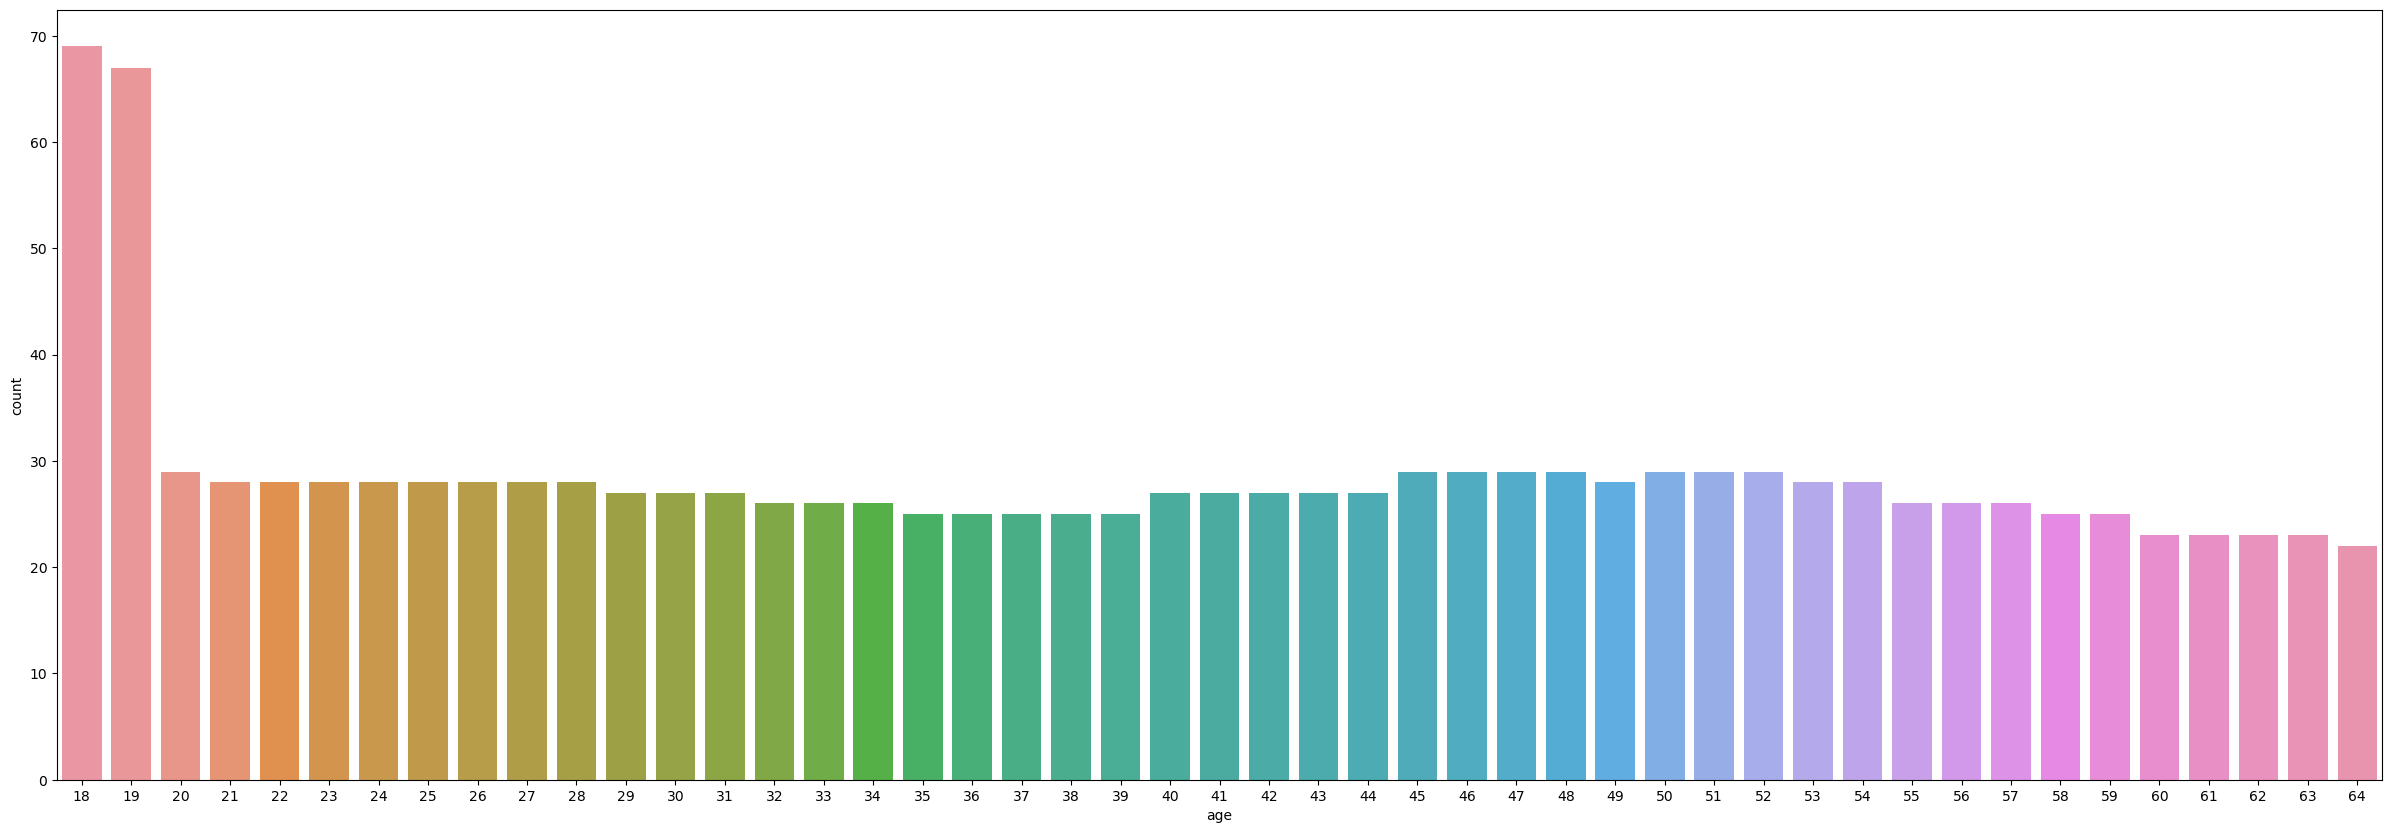

In [18]:
plt.figure(figsize =(30,10)) #matplotlib
sns.countplot(x='age',data = d1) #seaborn

<Axes: xlabel='sex', ylabel='count'>

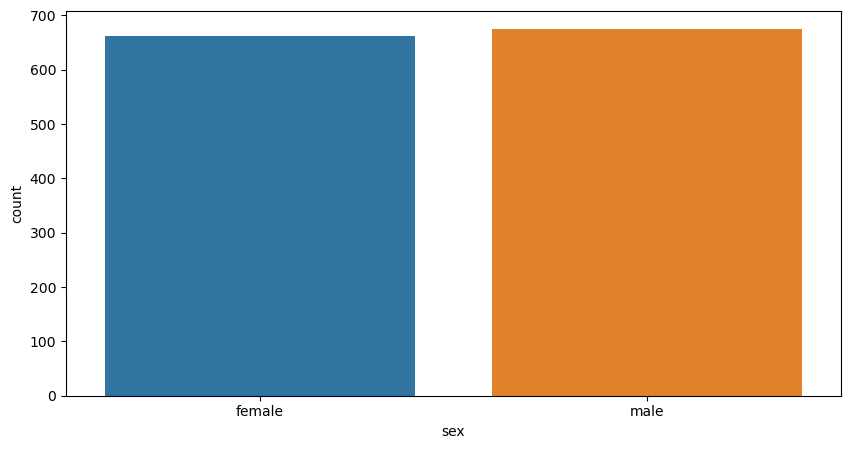

In [19]:
plt.figure(figsize =(10,5)) #matplotlib
sns.countplot(x='sex',data = d1)

# Pairplot

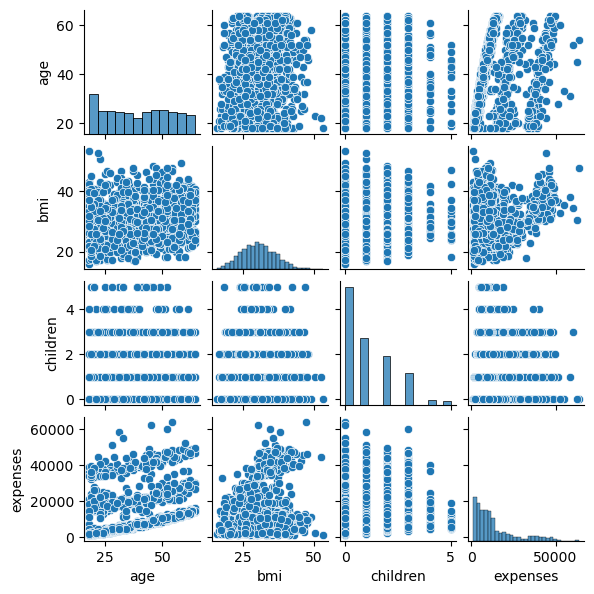

In [20]:
#plt.figure(figsize=(15,10))
sns.pairplot(data = d1, height = 1.5) # plot_kws = {"edgecolor" :'black'})   hue="species ", palette = "viridis", diag_kind = "hist" )
#plt.show()

# Heatmap

In [22]:
d1.corr(numeric_only = True)

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


<Axes: >

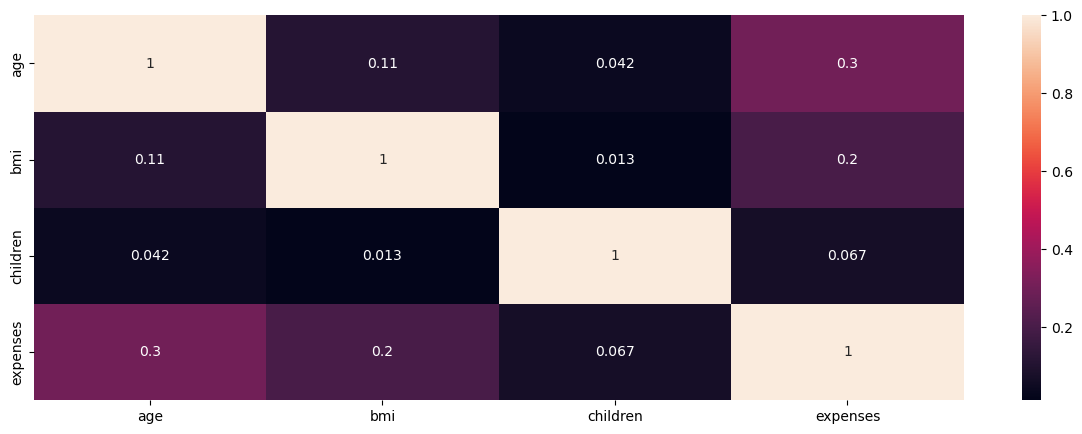

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(data=d1[numerical_features].corr(),annot=True)

# Visualization of Numerical Features With Target Feature

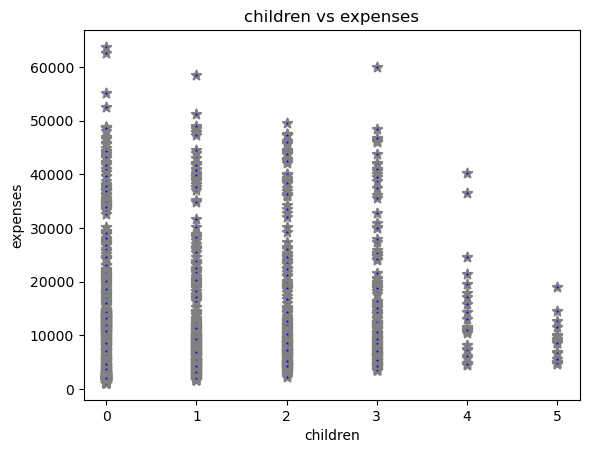

In [24]:
plt.scatter(d1['children'], d1['expenses'],c = 'blue',
           linewidths=1.5,
           marker='*',
           edgecolor='grey',
           s= 50)
plt.xlabel('children')
plt.ylabel('expenses')
plt.title('children vs expenses')
plt.show()

# Age vs Expenses

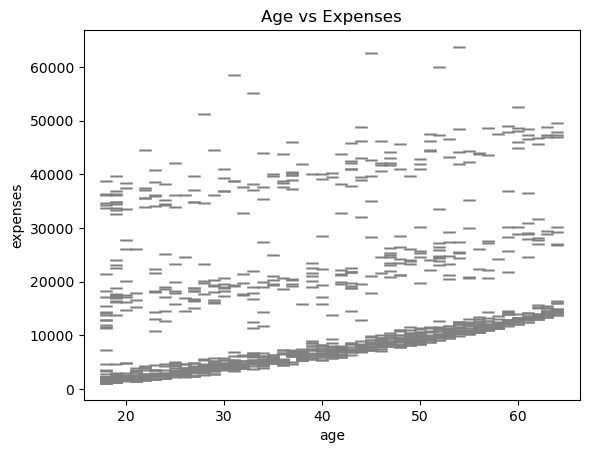

In [25]:
plt.scatter(d1['age'], d1['expenses'],c = 'grey',
           linewidths=9, #size of symbol
           marker='|',
           edgecolor='red',
           s= 2) #size
plt.xlabel('age')
plt.ylabel('expenses')
plt.title('Age vs Expenses')
plt.show()

<Axes: xlabel='age', ylabel='expenses'>

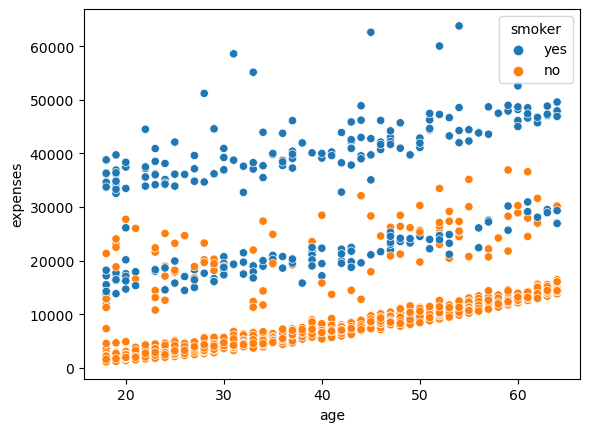

In [26]:
sns.scatterplot(data=d1, x = 'age', y= 'expenses', hue = 'smoker')

# BMI vs Expenses

<Axes: xlabel='bmi', ylabel='expenses'>

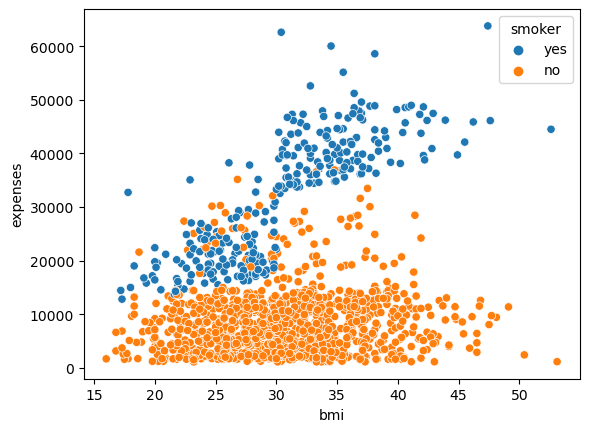

In [27]:
sns.scatterplot(data=d1, x = 'bmi', y= 'expenses', hue = 'smoker')

# Categorical Features Analysis

<Axes: xlabel='sex', ylabel='expenses'>

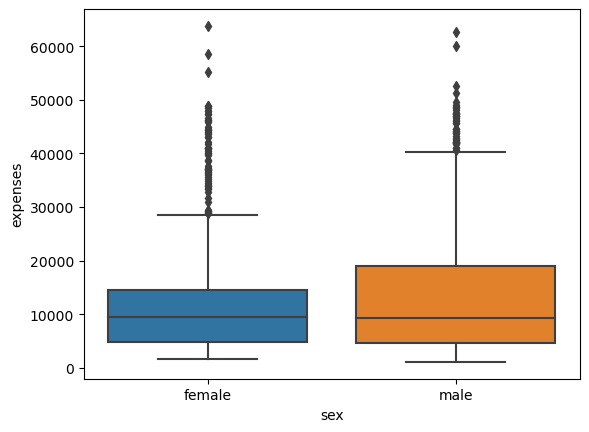

In [28]:
sns.boxplot(x ='sex', y='expenses',data=d1)

<Axes: xlabel='smoker', ylabel='expenses'>

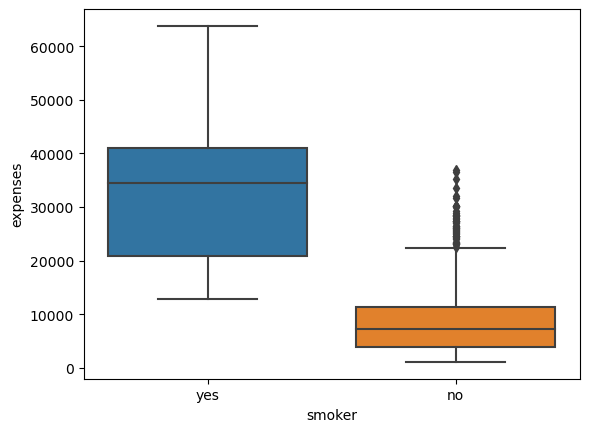

In [29]:
sns.boxplot(x='smoker',y='expenses',data=d1)

# Region vs expenses

<Axes: xlabel='region', ylabel='expenses'>

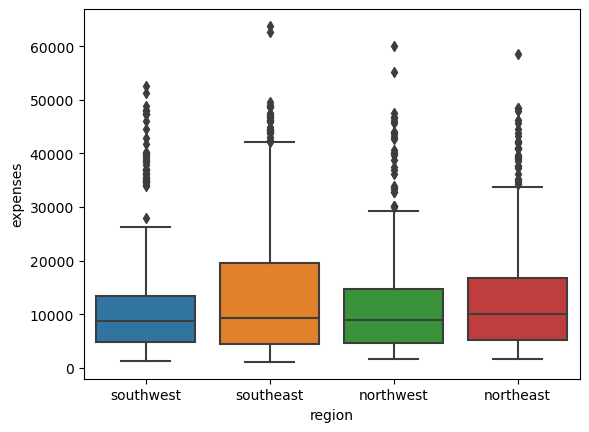

In [30]:
sns.boxplot(x = 'region', y = 'expenses', data=d1)

# Distribution of each feature

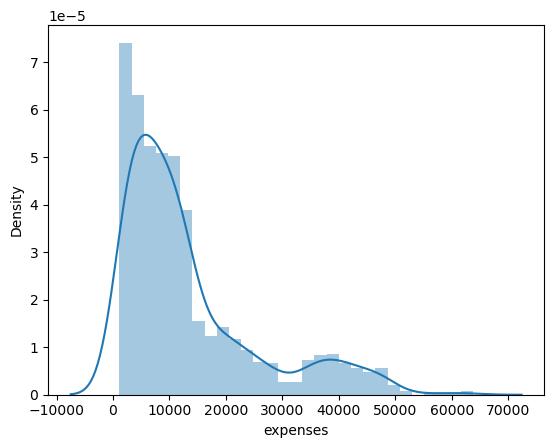

In [31]:
sns.distplot(d1['expenses'])
plt.show()

# BMI

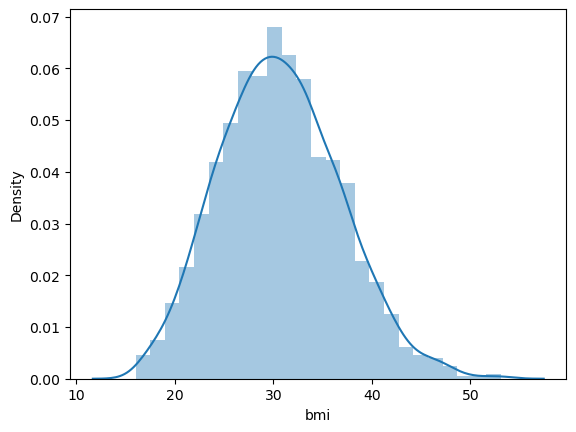

In [32]:
sns.distplot(d1['bmi'])
plt.show()

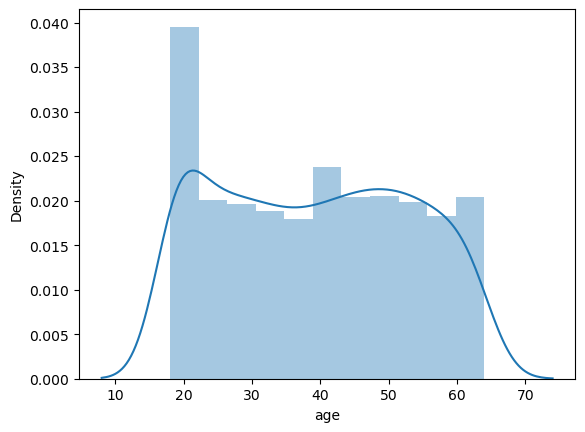

In [33]:
sns.distplot(d1['age'])
plt.show()

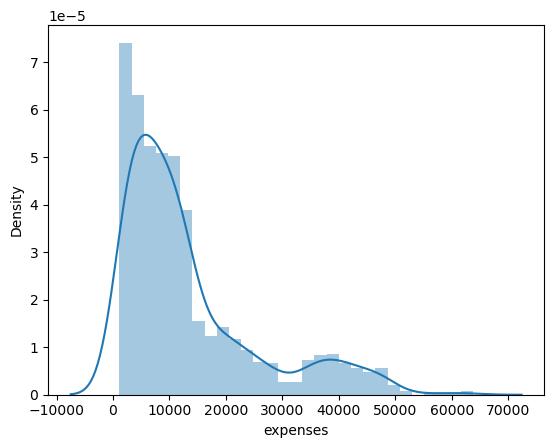

In [34]:
sns.distplot(d1['expenses'])
plt.show()